# Lab5 - Training Deep Neural Network
- Pasit Hankijpongpan, 60070501036
- Pisut Suntronkiti, 60070501037

Name your file to 60_34xx_34xx.ipynb

## Lab Instruction 

In this lab, you will learn to train a deep fully-connect neural network using Keras library with Tensorflow backend. We will use MNIST data which is a Keras build-in dataset. 

See http://yann.lecun.com/exdb/mnist

**Note:**
Before doing any machine learning/deep learning project, you have to think about the following thing:
1. What is your problem and your data?
- What type of problem do you want to solve? What is your data? What are you trying to predict? Does your data have enough information for your model to predict the expected output?

2. How do you measure your success?
- What do you mean by good model performance? How do you know that your model is ready to be deploy?
- Accuracy? Precision and recall? profit gain? ROC AUC?

3. What is your evaluation method?
- Hold-out method? CV? Iterate CV?

4. How to preprocess your data before fed into a model?

5. What is your baseline? What is a model structure? how does your last layer look like? What is your loss function? What is your optimization function? 

6. Develop a overfit model to figure out how big a model you need by <br>
6.1 Add more layer<br>
6.2 Make layer bigger<br>
6.3 Train more epochs<br>

7. Tune your model to balance the model performance between underfit and overfit (optimization vs generalization)



**Exploding Gradients :**

exploding gradients can result in an unstable network that at best cannot learn from the training data and at worst results in NaN weight values that can no longer be updated.

Ref : : https://machinelearningmastery.com/exploding-gradients-in-neural-networks/?fbclid=IwAR1DOg3pD0RSaxpHMZEEtIqxeCDMsvwkf-OxMb7HL5eK7_qLc4uLNEYcJus



First, import all important library to this project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

### 1. Load MNIST data

In [ ]:
from keras.datasets import mnist

### Load data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#################

11493376/11490434 [==============================] - 0s 0us/step


Learn more about the data. For example:
- The distribution of a target class. 
- The characteristic of the input data. How does it looklike? 
- etc.

train image shape: (60000, 28, 28)
test image shape: (10000, 28, 28)
train label shape: (60000,)
test label shape: (10000,)


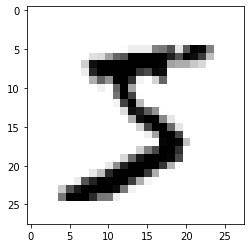

In [ ]:
# array shape
print("train image shape:",train_images.shape)
print("test image shape:",test_images.shape)
print("train label shape:",train_labels.shape)
print("test label shape:",test_labels.shape)

# imshow
plt.imshow(train_images[0], cmap=plt.cm.binary)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

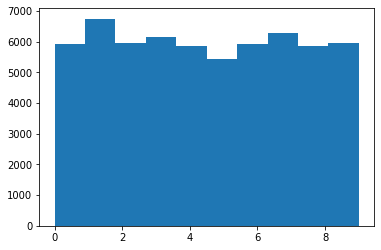

In [ ]:
# label distribution
plt.hist(train_labels)

### 2. Preprocess a data

In [ ]:
# scale data
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [ ]:
from keras.utils import to_categorical

# change to category
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


### 3. Build a model 
Using `Sequential()`, build a five-fully connected layer with 128 neurons each, *elu* as an activation function, and *he_initialier* as a weight initialier function. 
The output is a probability of each target class *softmax* as an activation function. We will use *Adam optimizer* with the *cross-entropy loss function*.

In [ ]:
from keras import layers, models, initializers

nn = models.Sequential()
nn.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros(), input_shape=(28*28,)))
nn.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn.add(layers.Dense(10, activation='softmax', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))

In [ ]:
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 167,818
Trainable params: 167,818
Non-trainable params: 0
________________________________________________

### 4. Train the model

We will train a total of 10 epoch and a batch size of 128. 

To prevent an information leak to test set, which casue an overfit, we will split the data to train set, test set, and validation set. Doing so, we will split the training data into 90% train set and 10% validation set.

Since keras `validation_split` argument split the last 10% of data to be validation set, the target class may not be equally distributed in validation set. Thus, we have to use `train_test_split`  from sklearn to split the data into train set and validation set. 

Hint: Use parameter `stratify = y` in `train_test_split()`
See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold

### Split data ###
# Split validation set using train_test_split
image_train, image_validation, label_train, label_validation = train_test_split(train_images, train_labels, shuffle=True, test_size=0.1)


# Split validation set using K-Fold
# kf = KFold(n_splits=10, shuffle=True)
# train_kf = []
# train_label_kf = []
# validation_kf = []
# validation_label_kf = []
# for train_index, validation_index in kf.split(train_images):
#   # split train set
#   train_temp = train_images[train_index]
#   train_label_temp = train_labels[train_index]
#   train_kf.append(train_temp)
#   train_label_kf.append(train_label_temp)
#   # split validation set
#   validation_temp = train_images[validation_index]
#   validation_label_temp = train_labels[train_index]
#   validation_kf.append(validation_temp)
#   validation_label_kf.append(validation_label_temp)

##################

In [ ]:
### Fit the model ###
history = nn.fit(image_train, label_train, epochs=10, batch_size=128, validation_data=(image_validation, label_validation))
#####################

Epoch 1/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2637 - accuracy: 0.9176 - val_loss: 0.1503 - val_accuracy: 0.9523
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.1182 - accuracy: 0.9629 - val_loss: 0.1149 - val_accuracy: 0.9662
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0861 - accuracy: 0.9730 - val_loss: 0.0881 - val_accuracy: 0.9727
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0660 - accuracy: 0.9781 - val_loss: 0.0993 - val_accuracy: 0.9708
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0552 - accuracy: 0.9816 - val_loss: 0.0882 - val_accuracy: 0.9763
Epoch 6/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0469 - accuracy: 0.9846 - val_loss: 0.0996 - val_accuracy: 0.9715
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0393 - accuracy: 0.9872 - val_loss: 0.1202 - val_accuracy: 0.9712
Epoch 


### 5. Evalute the model

Think of the metric that you want to evaluate/measure the performance of your model that can answer the following questions:
- The model is overfit or underfit.
- At which epoch/iteration that it converge or the model become overfit.
- How does the model perform on each data class. What is an overall performace of your model?

In [ ]:
### Evaluate the model ###
test_loss,test_acc = nn.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

313/313 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.9723
Test Loss: 0.11097680777311325
Test Accuracy: 0.9722999930381775


In [ ]:
temp = nn.predict(test_images)
nn_pred = np.zeros_like(temp)
nn_pred[np.arange(len(temp)), temp.argmax(1)] = 1

print(classification_report(test_labels, nn_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.96      0.96      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000
 samples avg       0.97      0.97      0.97     10000



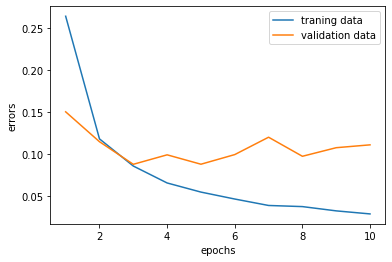

In [ ]:
epoch = len(history.history['loss'])
line1, = plt.plot(range(1,epoch+1), history.history['loss'], label="traning data")
line2, = plt.plot(range(1,epoch+1), history.history['val_loss'], label="validation data")
plt.legend(handles=[line1,line2])
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()

### 6. Tune the model 

Try to tune your model by: 
1. Try Increasing epoch and see how it affect your model? Does the result better or it get overfit?
2. Apply an early stop. What is the result do you get? (See https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/)
4. Try adding regularizer l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?
5. Try to add dropout (any dropout rate) with every layer. How does it affect your model? Does it help reduce overfit?

*Discuss the result from these step in the discssion section*

After try above step, **try to achive the highest precision** by tuning the model using what you had aleady learn in the class.
You can try to change the structure of the model by increase or decrease the layer and neuron node in each layer. (Use only fully-connect layer, don't use other type of layer yet!)

**The current highest precision of MNIST model is around 99.8%** ( Just try as must as possible, don't worry if you don't achieve this number of precision.)

**Write  down what are you doing and why in each tuning step**

**1. Increase epoch**

In [ ]:
# create new nn
nn2 = models.Sequential()
nn2.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros(), input_shape=(28*28,)))
nn2.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn2.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn2.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn2.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn2.add(layers.Dense(10, activation='softmax', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))

In [ ]:
nn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = nn2.fit(image_train, label_train, epochs=50, batch_size=128, validation_data=(image_validation, label_validation))

Epoch 1/50
422/422 [==============================] - 3s 7ms/step - loss: 0.2576 - accuracy: 0.9225 - val_loss: 0.1283 - val_accuracy: 0.9593
Epoch 2/50
422/422 [==============================] - 3s 6ms/step - loss: 0.1198 - accuracy: 0.9625 - val_loss: 0.0968 - val_accuracy: 0.9710
Epoch 3/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0885 - accuracy: 0.9711 - val_loss: 0.1036 - val_accuracy: 0.9688
Epoch 4/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0655 - accuracy: 0.9788 - val_loss: 0.0786 - val_accuracy: 0.9762
Epoch 5/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0539 - accuracy: 0.9824 - val_loss: 0.1075 - val_accuracy: 0.9718
Epoch 6/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0504 - accuracy: 0.9827 - val_loss: 0.0965 - val_accuracy: 0.9732
Epoch 7/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0411 - accuracy: 0.9859 - val_loss: 0.0954 - val_accuracy: 0.9738
Epoch 

In [ ]:
### Evaluate the model ###
test2_loss, test2_acc = nn2.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test2_loss,test2_acc))
##########################

313/313 [==============================] - 1s 2ms/step - loss: 0.1555 - accuracy: 0.9792
Test Loss: 0.1555444598197937
Test Accuracy: 0.979200005531311


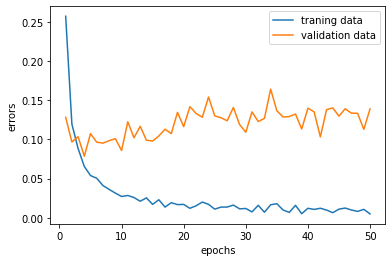

In [ ]:
epoch = len(history2.history['loss'])
line1, = plt.plot(range(1,epoch+1), history2.history['loss'], label="traning data")
line2, = plt.plot(range(1,epoch+1), history2.history['val_loss'], label="validation data")
plt.legend(handles=[line1,line2])
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()

**2. Implement early stop**

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# setup early stopping
callbacks = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
# create new nn
nn3 = models.Sequential()
nn3.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros(), input_shape=(28*28,)))
nn3.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn3.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn3.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn3.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn3.add(layers.Dense(10, activation='softmax', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))

In [ ]:
nn3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history3 = nn3.fit(image_train, label_train, epochs=50, batch_size=128, callbacks=callbacks, validation_data=(image_validation, label_validation))

Epoch 1/50
422/422 [==============================] - 3s 7ms/step - loss: 0.2610 - accuracy: 0.9193 - val_loss: 0.1225 - val_accuracy: 0.9617
Epoch 2/50
422/422 [==============================] - 3s 6ms/step - loss: 0.1163 - accuracy: 0.9636 - val_loss: 0.0965 - val_accuracy: 0.9708
Epoch 3/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0832 - accuracy: 0.9734 - val_loss: 0.1027 - val_accuracy: 0.9685
Epoch 4/50
422/422 [==============================] - 3s 7ms/step - loss: 0.0660 - accuracy: 0.9788 - val_loss: 0.0930 - val_accuracy: 0.9733
Epoch 5/50
422/422 [==============================] - 3s 7ms/step - loss: 0.0553 - accuracy: 0.9815 - val_loss: 0.0875 - val_accuracy: 0.9777
Epoch 6/50
422/422 [==============================] - 3s 7ms/step - loss: 0.0461 - accuracy: 0.9848 - val_loss: 0.0867 - val_accuracy: 0.9758
Epoch 7/50
422/422 [==============================] - 3s 7ms/step - loss: 0.0415 - accuracy: 0.9863 - val_loss: 0.1070 - val_accuracy: 0.9710
Epoch 

In [ ]:
### Evaluate the model ###
test3_loss, test3_acc = nn3.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test3_loss,test3_acc))
##########################

313/313 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.9710
Test Loss: 0.10707863420248032
Test Accuracy: 0.9710000157356262


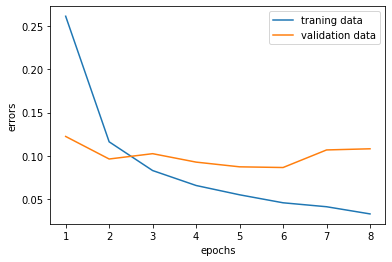

In [ ]:
epoch = len(history3.history['loss'])
line1, = plt.plot(range(1,epoch+1), history3.history['loss'], label="traning data")
line2, = plt.plot(range(1,epoch+1), history3.history['val_loss'], label="validation data")
plt.legend(handles=[line1,line2])
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()

**3. Adding regularizer**

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
# create new nn
nn4 = models.Sequential()
nn4.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros(), 
                     kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5),
                     bias_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5),
                     activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5), 
                     input_shape=(28*28,)))
nn4.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros(), 
                     kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5),
                     bias_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5),
                     activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5)))
nn4.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros(), 
                     kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5),
                     bias_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5),
                     activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5)))
nn4.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros(), 
                     kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5),
                     bias_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5),
                     activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5)))
nn4.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros(), 
                     kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5),
                     bias_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5),
                     activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5)))
nn4.add(layers.Dense(10, activation='softmax', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros(), 
                     kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5),
                     bias_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5),
                     activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5)))

In [ ]:
nn4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history4 = nn4.fit(image_train, label_train, epochs=50, batch_size=128, validation_data=(image_validation, label_validation))

Epoch 1/50
422/422 [==============================] - 4s 10ms/step - loss: 0.3826 - accuracy: 0.9219 - val_loss: 0.2633 - val_accuracy: 0.9612
Epoch 2/50
422/422 [==============================] - 4s 8ms/step - loss: 0.2433 - accuracy: 0.9639 - val_loss: 0.2393 - val_accuracy: 0.9633
Epoch 3/50
422/422 [==============================] - 4s 9ms/step - loss: 0.2094 - accuracy: 0.9731 - val_loss: 0.2177 - val_accuracy: 0.9717
Epoch 4/50
422/422 [==============================] - 4s 9ms/step - loss: 0.1925 - accuracy: 0.9789 - val_loss: 0.2082 - val_accuracy: 0.9747
Epoch 5/50
422/422 [==============================] - 4s 9ms/step - loss: 0.1778 - accuracy: 0.9816 - val_loss: 0.1986 - val_accuracy: 0.9768
Epoch 6/50
422/422 [==============================] - 5s 11ms/step - loss: 0.1695 - accuracy: 0.9843 - val_loss: 0.2055 - val_accuracy: 0.9762
Epoch 7/50
422/422 [==============================] - 4s 10ms/step - loss: 0.1650 - accuracy: 0.9846 - val_loss: 0.1921 - val_accuracy: 0.9785
Epo

In [ ]:
### Evaluate the model ###
test4_loss, test4_acc = nn4.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test4_loss,test4_acc))
##########################

313/313 [==============================] - 1s 2ms/step - loss: 0.1494 - accuracy: 0.9791
Test Loss: 0.14941371977329254
Test Accuracy: 0.9790999889373779


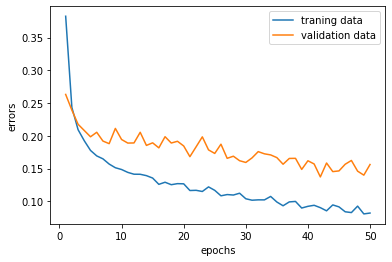

In [ ]:
epoch = len(history4.history['loss'])
line1, = plt.plot(range(1,epoch+1), history4.history['loss'], label="traning data")
line2, = plt.plot(range(1,epoch+1), history4.history['val_loss'], label="validation data")
plt.legend(handles=[line1,line2])
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()

**4. dropout**

In [ ]:
from keras.layers import Dropout

In [ ]:
# create new nn
nn5 = models.Sequential()
nn5.add(Dropout(.2, input_shape=(28*28,)))
nn5.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros(), input_shape=(28*28,)))
nn5.add(Dropout(.2))
nn5.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn5.add(Dropout(.2))
nn5.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn5.add(Dropout(.2))
nn5.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn5.add(Dropout(.2))
nn5.add(layers.Dense(128, activation='elu', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))
nn5.add(Dropout(.2))
nn5.add(layers.Dense(10, activation='softmax', kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.Zeros()))

In [ ]:
nn5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history5 = nn5.fit(image_train, label_train, epochs=50, batch_size=128, validation_data=(image_validation, label_validation))

Epoch 1/50
422/422 [==============================] - 4s 9ms/step - loss: 0.6258 - accuracy: 0.8034 - val_loss: 0.2234 - val_accuracy: 0.9312
Epoch 2/50
422/422 [==============================] - 4s 8ms/step - loss: 0.3418 - accuracy: 0.8951 - val_loss: 0.1805 - val_accuracy: 0.9460
Epoch 3/50
422/422 [==============================] - 4s 9ms/step - loss: 0.2778 - accuracy: 0.9148 - val_loss: 0.1396 - val_accuracy: 0.9570
Epoch 4/50
422/422 [==============================] - 4s 9ms/step - loss: 0.2454 - accuracy: 0.9254 - val_loss: 0.1272 - val_accuracy: 0.9635
Epoch 5/50
422/422 [==============================] - 4s 8ms/step - loss: 0.2162 - accuracy: 0.9332 - val_loss: 0.1128 - val_accuracy: 0.9658
Epoch 6/50
422/422 [==============================] - 4s 8ms/step - loss: 0.1941 - accuracy: 0.9401 - val_loss: 0.1057 - val_accuracy: 0.9685
Epoch 7/50
422/422 [==============================] - 4s 9ms/step - loss: 0.1877 - accuracy: 0.9436 - val_loss: 0.1085 - val_accuracy: 0.9678
Epoch 

In [ ]:
### Evaluate the model ###
test5_loss, test5_acc = nn5.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test5_loss,test5_acc))
##########################

313/313 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9821
Test Loss: 0.0690075159072876
Test Accuracy: 0.9821000099182129


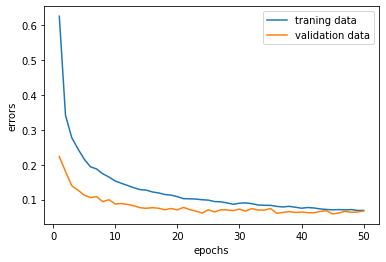

In [ ]:
epoch = len(history5.history['loss'])
line1, = plt.plot(range(1,epoch+1), history5.history['loss'], label="traning data")
line2, = plt.plot(range(1,epoch+1), history5.history['val_loss'], label="validation data")
plt.legend(handles=[line1,line2])
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()

### 7. Final Evaluation

After you make sure that your model is good enough to be deploy in application, it is a time to evaluate your model with test set in order to test that your model is generalize well and not overfit to validation set.

In [ ]:
# model1: 10 epochs
# model2: 50 epochs
# model3: 50 epochs with early stopping
# model4: 50 epochs with l1 l2 regularizer
# model5: 50 epochs with dropout

summary_eval = pd.DataFrame([[test_loss, test_acc], [test2_loss, test2_acc], [test3_loss, test3_acc], [test4_loss, test4_acc], [test5_loss, test5_acc]], columns=['loss', 'accuracy'], index=['model1', 'model2', 'model3', 'model4', 'model5'])
summary_eval

,loss,accuracy
model1,0.110977,0.9723
model2,0.155544,0.9792
model3,0.107079,0.9710
model4,0.149414,0.9791
model5,0.069008,0.9821


Text(0, 0.5, 'errors')

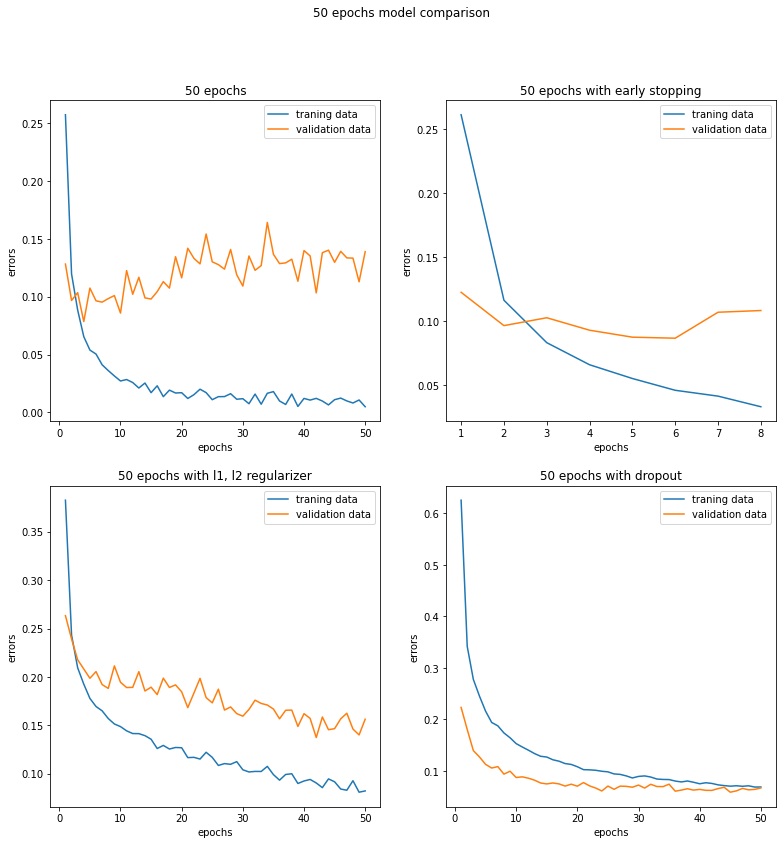

In [ ]:
fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('50 epochs model comparison')
fig.set_figheight(13)
fig.set_figwidth(13)

# model2: 50 epochs
epoch = len(history2.history['loss'])
line1, = ax1.plot(range(1,epoch+1), history2.history['loss'], label="traning data")
line2, = ax1.plot(range(1,epoch+1), history2.history['val_loss'], label="validation data")
ax1.legend(handles=[line1,line2])
ax1.set_title('50 epochs')
ax1.set_xlabel('epochs')
ax1.set_ylabel('errors')

# model3: 50 epochs with early stopping
epoch = len(history3.history['loss'])
line1, = ax2.plot(range(1,epoch+1), history3.history['loss'], label="traning data")
line2, = ax2.plot(range(1,epoch+1), history3.history['val_loss'], label="validation data")
ax2.legend(handles=[line1,line2])
ax2.set_title('50 epochs with early stopping')
ax2.set_xlabel('epochs')
ax2.set_ylabel('errors')

# model4: 50 epochs with l1 l2 regularizer
epoch = len(history4.history['loss'])
line1, = ax3.plot(range(1,epoch+1), history4.history['loss'], label="traning data")
line2, = ax3.plot(range(1,epoch+1), history4.history['val_loss'], label="validation data")
ax3.legend(handles=[line1,line2])
ax3.set_title('50 epochs with l1, l2 regularizer')
ax3.set_xlabel('epochs')
ax3.set_ylabel('errors')

# model5: 50 epochs with dropout
epoch = len(history5.history['loss'])
line1, = ax4.plot(range(1,epoch+1), history5.history['loss'], label="traning data")
line2, = ax4.plot(range(1,epoch+1), history5.history['val_loss'], label="validation data")
ax4.legend(handles=[line1,line2])
ax4.set_title('50 epochs with dropout')
ax4.set_xlabel('epochs')
ax4.set_ylabel('errors')

### Result & Discussion 

- Write down the key finding from this lab. Discuss what you had done, what do you get from the output or a result, and why (support your reason)

**Evaluation the model** <br>
   From data and graph, the model is overfit. It is becoming  overfit at the 5th epoch. The accuracy score is 0.972 and the performance on each data class is shown below image.<br>
   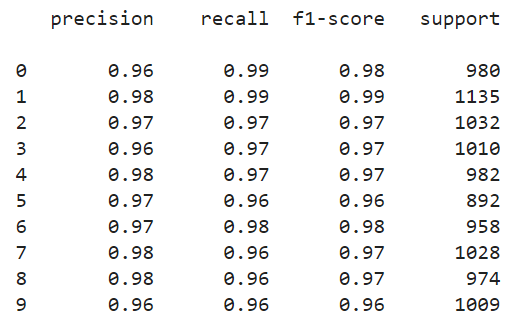



**Tune the model** <br>
1. **Increasing epoch** we have increased epoch for the model from 10 to 50 epochs in the *fit()* method. The result is still overfit, in another word, it is not better because of its more overfitting. The accuracy score is 0.979.
2. **Implement early stopping** we defined *callback* as the early stopping function. The callback is set that if loss value of the model is not better (decreased) among 2 epoch, the traning process will be interupted.  The last epoch is 8th and the accuracy score is 0.971
3. **Adding regularizer** we add simultanous L1 and L2 for kernel regularizer, bias regularizer and activity regularizer by L1 = 10e-5 and L2 = 10e-5 to every hidden-layer in the model. The accuracy score is 0.979.
4. **Applying dropout** we add dropout with probability *p* = 0.2 to every hidden-layer. The accuracy score is 0.982.

**Play with your model**<br>
The model always predicts zero class as result, so it is not correct. That may cause from pixel-detailed line of input which be not like training data, they are more sharper than the training one.

### 8. Play with your model

1. Use any kind of drawing application ( For example, Paint or Adobe Photoshop ), create a 28x28 pixel (any resolution) with black (#000000) background and white (#FFFFFF) paint. 
2. Draw 3 any distinct single digit number of a range from 0 - 9. Then save the image (PNG)

for local pc :
3. Install open-cv (See https://pypi.org/project/opencv-python) by 
> `pip install opencv-python` <br/> or conda (See https://anaconda.org/conda-forge/opencv)

for colab use:
3. ```import cv2 as cv```
4. Load your image to this IPython using ```imread()``` function
5. Preprocess as what you did during the development stage.
6. Feed your image to your best model.

What class do your model predict? Does it correct? If not, why do it still get negative result since your model get more than 90% accuracy?

In [ ]:
import cv2 as cv
import numpy as np

# import images
one_img = cv.imread('one.png', 0)
two_img = cv.imread('two.png', 0)
three_img = cv.imread('three.png', 0)
seven_img = cv.imread('seven.png', 0)
test_img = np.array([one_img, two_img, three_img, seven_img])
# plt.imshow(test_img[0], cmap=plt.cm.binary)

# image labels
test_label = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
                       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
                       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

# scale images as preprocessing
test_img = test_img.reshape(4,28*28)
test_img = test_img.astype('float32')/255

# feed image to the best model
# dropoutNN = nn5
res = np.zeros_like(nn5.predict(test_img))
res[np.arange(len(res)), res.argmax(1)] = 1
print(res)
# print(classification_report(test_label, res))


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Challenges: Play with initializer

- Create two-layer neural network with any hyperparameter
- Use or create an weight initializer function that initialize all the weight to one. See: https://keras.io/initializers/
- Discuss the result. what happen? and why?

In [ ]:
chall_nn = models.Sequential()
units = 512
chall_nn.add(layers.Dense(units, activation= 'relu', kernel_initializer=initializers.Ones(), bias_initializer=initializers.Ones(), input_shape=(28*28,)))
chall_nn.add(layers.Dense(10, activation= 'softmax', kernel_initializer=initializers.Ones(), bias_initializer=initializers.Ones()))

In [ ]:
chall_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
chall_history = chall_nn.fit(image_train, label_train, epochs=50, batch_size=128, validation_data=(image_validation, label_validation))

Epoch 1/50
422/422 [==============================] - 3s 8ms/step - loss: 22.6741 - accuracy: 0.0994 - val_loss: 11.6670 - val_accuracy: 0.0980
Epoch 2/50
422/422 [==============================] - 3s 7ms/step - loss: 7.8718 - accuracy: 0.1009 - val_loss: 3.9442 - val_accuracy: 0.0998
Epoch 3/50
422/422 [==============================] - 3s 7ms/step - loss: 3.2903 - accuracy: 0.1025 - val_loss: 3.2197 - val_accuracy: 0.1227
Epoch 4/50
422/422 [==============================] - 3s 7ms/step - loss: 2.6194 - accuracy: 0.1479 - val_loss: 2.2310 - val_accuracy: 0.1800
Epoch 5/50
422/422 [==============================] - 3s 7ms/step - loss: 2.0352 - accuracy: 0.2511 - val_loss: 2.0807 - val_accuracy: 0.2793
Epoch 6/50
422/422 [==============================] - 3s 7ms/step - loss: 1.8484 - accuracy: 0.2959 - val_loss: 1.6322 - val_accuracy: 0.3635
Epoch 7/50
422/422 [==============================] - 3s 7ms/step - loss: 1.7037 - accuracy: 0.3428 - val_loss: 1.5724 - val_accuracy: 0.4228
Epoc

In [ ]:
chall_nn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### Evaluate the model ###
chall_loss, chall_acc = chall_nn.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (chall_loss,chall_acc))
##########################

313/313 [==============================] - 1s 2ms/step - loss: 1.0518 - accuracy: 0.6294
Test Loss: 1.0517847537994385
Test Accuracy: 0.6294000148773193


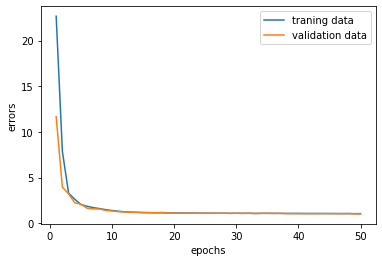

In [ ]:
epoch = len(chall_history.history['loss'])
line1, = plt.plot(range(1,epoch+1), chall_history.history['loss'], label="traning data")
line2, = plt.plot(range(1,epoch+1), chall_history.history['val_loss'], label="validation data")
plt.legend(handles=[line1,line2])
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()

**Challenge discussion**  <br>
As the above experiment, we notice that after we change the weight and bias initializer methods to all one, the accuracies of each layers start at very low values and the training and validation errors is converge.